In [30]:
#import needed libraries
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

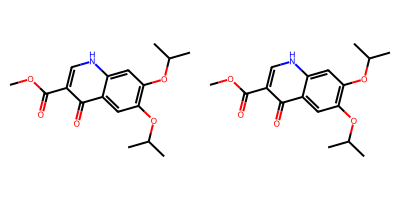

In [42]:
#test printing molecule
smiles = ['COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O', "COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [43]:
#import data
data_raw = pd.read_csv('tested_molecules.csv')
data_raw

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0
...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1


In [44]:
#make for each SMILES stirng, new object
data_properties = data_raw.copy()
data_properties['molecule_object'] = [Chem.MolFromSmiles(x) for x in data_properties['SMILES']]


#calculate properties of molecules
#useful link for this: https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
data_properties['num_atoms'] = [x.GetNumAtoms() for x in data_properties['molecule_object']]
data_properties['molecular_weight'] = [rdkit.Chem.rdMolDescriptors.CalcExactMolWt(x) for x in data_properties['molecule_object']]
data_properties['num_heavy_atoms'] = [rdkit.Chem.rdMolDescriptors.CalcNumHeavyAtoms(x) for x in data_properties['molecule_object']]
data_properties['num_amide_bonds'] = [rdkit.Chem.rdMolDescriptors.CalcNumAmideBonds(x) for x in data_properties['molecule_object']]
data_properties['num_aromatic_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumAromaticRings(x) for x in data_properties['molecule_object']]
data_properties['num_stereocenters'] = [rdkit.Chem.rdMolDescriptors.CalcNumAtomStereoCenters(x) for x in data_properties['molecule_object']]
data_properties['num_H_bond_acceptors'] = [rdkit.Chem.rdMolDescriptors.CalcNumHBA(x) for x in data_properties['molecule_object']]
data_properties['num_H_bond_donors'] = [rdkit.Chem.rdMolDescriptors.CalcNumHBD(x) for x in data_properties['molecule_object']]
data_properties['num_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumRings(x) for x in data_properties['molecule_object']]
data_properties['num_rotatable_bonds'] = [rdkit.Chem.rdMolDescriptors.CalcNumRotatableBonds(x) for x in data_properties['molecule_object']]

# Added by Kaj
data_properties['fraction_c_sp3'] = [rdkit.Chem.rdMolDescriptors.CalcFractionCSP3(x) for x in data_properties['molecule_object']]
data_properties['num_saturated_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumSaturatedRings(x) for x in data_properties['molecule_object']]
data_properties['num_spiro_atoms'] = [rdkit.Chem.rdMolDescriptors.CalcNumSpiroAtoms(x) for x in data_properties['molecule_object']]
data_properties['num_aliphatic_rings'] = [rdkit.Chem.rdMolDescriptors.CalcNumAliphaticRings(x) for x in data_properties['molecule_object']]
data_properties['num_aromatic_carbocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumAromaticCarbocycles(x) for x in data_properties['molecule_object']]
data_properties['num_aromatic_heterocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumAromaticHeterocycles(x) for x in data_properties['molecule_object']]
data_properties['num_bridgehead_atoms'] = [rdkit.Chem.rdMolDescriptors.CalcNumBridgeheadAtoms(x) for x in data_properties['molecule_object']]
data_properties['num_lipinski_H_bond_acceptors'] = [rdkit.Chem.rdMolDescriptors.CalcNumLipinskiHBA(x) for x in data_properties['molecule_object']]
data_properties['num_lipinski_H_bond_donors'] = [rdkit.Chem.rdMolDescriptors.CalcNumLipinskiHBD(x) for x in data_properties['molecule_object']]
data_properties['num_saturated_carbocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumSaturatedCarbocycles(x) for x in data_properties['molecule_object']]
data_properties['num_saturated_heterocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumSaturatedHeterocycles(x) for x in data_properties['molecule_object']]
data_properties['num_unspecified_stereo_center'] = [rdkit.Chem.rdMolDescriptors.CalcNumUnspecifiedAtomStereoCenters(x) for x in data_properties['molecule_object']]
data_properties['phi'] = [rdkit.Chem.rdMolDescriptors.CalcPhi(x) for x in data_properties['molecule_object']]
data_properties['hall_kier_alpha'] = [rdkit.Chem.rdMolDescriptors.CalcHallKierAlpha(x) for x in data_properties['molecule_object']]

# Added by Liza
data_properties['chi0n'] = [rdkit.Chem.rdMolDescriptors.CalcChi0n(x) for x in data_properties['molecule_object']]
data_properties['chi0v'] = [rdkit.Chem.rdMolDescriptors.CalcChi0v(x) for x in data_properties['molecule_object']]
data_properties['chi1n'] = [rdkit.Chem.rdMolDescriptors.CalcChi1n(x) for x in data_properties['molecule_object']]
data_properties['chi1v'] = [rdkit.Chem.rdMolDescriptors.CalcChi1v(x) for x in data_properties['molecule_object']]
data_properties['chi2n'] = [rdkit.Chem.rdMolDescriptors.CalcChi2n(x) for x in data_properties['molecule_object']]
data_properties['chi2v'] = [rdkit.Chem.rdMolDescriptors.CalcChi2v(x) for x in data_properties['molecule_object']]
data_properties['chi3n'] = [rdkit.Chem.rdMolDescriptors.CalcChi3n(x) for x in data_properties['molecule_object']]
data_properties['chi3v'] = [rdkit.Chem.rdMolDescriptors.CalcChi3v(x) for x in data_properties['molecule_object']]
data_properties['chi4n'] = [rdkit.Chem.rdMolDescriptors.CalcChi4n(x) for x in data_properties['molecule_object']]
data_properties['chi4v'] = [rdkit.Chem.rdMolDescriptors.CalcChi4v(x) for x in data_properties['molecule_object']]
data_properties['kappa1'] = [rdkit.Chem.rdMolDescriptors.CalcKappa1(x)for x in data_properties['molecule_object']]
data_properties['kappa2'] = [rdkit.Chem.rdMolDescriptors.CalcKappa2(x)for x in data_properties['molecule_object']]
data_properties['kappa3'] = [rdkit.Chem.rdMolDescriptors.CalcKappa3(x)for x in data_properties['molecule_object']]
data_properties['kappa3'] = [rdkit.Chem.rdMolDescriptors.CalcKappa3(x)for x in data_properties['molecule_object']]
data_properties['num_aliphatic_carbocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumAliphaticCarbocycles(x)for x in data_properties['molecule_object']]
data_properties['num_aliphatic_heterocycles'] = [rdkit.Chem.rdMolDescriptors.CalcNumAliphaticHeterocycles(x)for x in data_properties['molecule_object']]

data_properties.head()

data_properties.head()
data_decriptors = data_properties.iloc[:,4:]
data_decriptors

,num_atoms,molecular_weight,num_heavy_atoms,num_amide_bonds,num_aromatic_rings,num_stereocenters,num_H_bond_acceptors,num_H_bond_donors,num_rings,num_rotatable_bonds,...,chi2v,chi3n,chi3v,chi4n,chi4v,kappa1,kappa2,kappa3,num_aliphatic_carbocycles,num_aliphatic_heterocycles
0,11,151.085795,11,0,1,0,5,2,1,1,...,2.155745,1.051723,1.051723,0.600230,0.600230,7.456952,2.531038,1.635047,0,0
1,17,250.039672,17,0,2,0,3,0,2,3,...,4.246873,2.318276,2.427385,1.556670,1.611225,11.736876,4.634332,2.683837,0,0
2,15,210.136828,15,2,0,0,2,2,0,8,...,3.039058,1.694814,1.694814,0.958288,0.958288,13.420000,8.993915,8.742061,0,0
3,17,232.084792,17,0,2,0,4,0,2,3,...,3.552474,2.439419,2.439419,1.586949,1.586949,11.193326,4.288212,1.753868,0,0
4,15,226.050905,15,0,1,0,4,0,1,4,...,3.312281,1.832716,2.091973,1.178089,1.397909,11.524349,4.794989,2.274281,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,27,362.126657,27,1,3,1,5,1,5,4,...,6.504980,4.810163,4.810163,3.550276,3.550276,15.814556,6.391215,2.789857,0,2
1112,25,374.042773,25,0,4,0,4,1,4,4,...,8.000394,3.695156,5.886295,2.495984,4.270540,15.796604,5.978180,3.132397,0,0
1113,25,355.132015,25,0,3,0,4,2,4,3,...,6.774651,4.778711,5.091420,3.411607,3.695811,16.117600,6.860901,3.251481,0,1
1114,23,322.125218,23,0,3,0,5,0,4,3,...,6.379931,4.085081,4.986497,2.818657,3.707182,14.208733,6.380383,3.052191,0,1


In [45]:
one_molecule = data_properties['molecule_object'].iloc[0]
#a = rdkit.Chem.rdMolDescriptors.CalcExactMolWt(one_molecule)


In [46]:
# Hier moeten nog de outliers uitgehaald worden


In [47]:
# Monique toegevoegd
# scale data via minmax scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_decriptors)

# use PCA
pca = PCA()
pca.fit(scaled_data)


PCA()

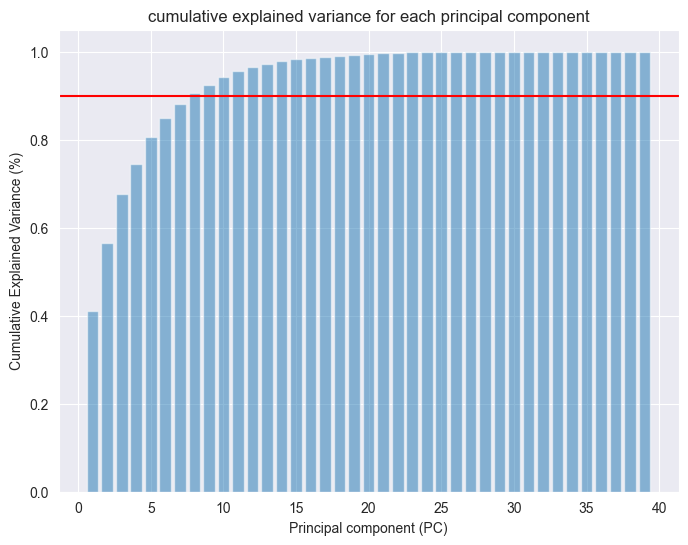

In [48]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, align='center')

plt.axhline(y=0.9,color='r',linestyle='-')
plt.xlabel('Principal component (PC)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('cumulative explained variance for each principal component')

plt.show()

In [49]:
# Kijken welke het belangrijkste is in pc1
important_idx = np.argmax(np.abs(pca.components_[0]))
important_feature = data_decriptors.columns[important_idx]
important_feature

'molecular_weight'

In [50]:
# Kijken welke het minst belangrijkste is
important_idx = np.argmin(np.abs(pca.components_[0]))
important_feature = data_decriptors.columns[important_idx]
important_feature

'num_unspecified_stereo_center'